In [1]:
import numpy as np
import keras
from keras.layers import Input,Dense,Flatten,Reshape,Dropout
from keras.layers import BatchNormalization,Activation,ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.optimizers import Adam
from keras.layers import Conv2D,Conv2DTranspose
import sys
from matplotlib import  pyplot as plt

Using TensorFlow backend.


In [0]:
class DCGAN():
	def __init__(self):
		self.img_rows=28
		self.img_cols=28
		self.channels=1
		self.img_shape=(self.img_rows,self.img_cols,self.channels)
		self.z_dim=100

	def sample_images(self, image_grid_rows=4,image_grid_columns=4):
		z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns,self.z_dim)) 
		print("shape",z.shape)
		gen_imgs = self.generator.predict(z)
		gen_imgs = 0.5 * gen_imgs + 0.5
		fig, axs = plt.subplots(image_grid_rows,image_grid_columns,
			figsize=(4, 4),sharey=True,sharex=True)
		cnt = 0
		for i in range(image_grid_rows):
			for j in range(image_grid_columns):
				axs[i, j].imshow(gen_imgs[cnt, :, :, 0])
				axs[i, j].axis('off')
				cnt += 1
		plt.show()
	def build_generator(self,z_dim):
		
		self.generator=Sequential()
		self.generator.add(Dense(256 * 7 * 7,input_dim=z_dim))
		self.generator.add(Reshape((7,7,256)))
		self.generator.add(Conv2DTranspose(128,kernel_size=3,strides=2,padding='same'))
		self.generator.add(BatchNormalization(momentum=0.8))
		self.generator.add(LeakyReLU(alpha=0.01))
		self.generator.add(Conv2DTranspose(64,(3,3),padding='same'))
		self.generator.add(BatchNormalization())
		self.generator.add(LeakyReLU(alpha=0.01))
		self.generator.add(Conv2DTranspose(self.channels,kernel_size=3, strides=2,padding='same'))
		self.generator.add(Activation("tanh"))
		return self.generator

	def build_discriminator(self,img_shape):
		self.discriminator = Sequential()
		self.discriminator.add(Conv2D(32,kernel_size=3,strides=2,input_shape=self.img_shape,padding='same'))
		self.discriminator.add(LeakyReLU(alpha=0.01))
		self.discriminator.add(Conv2D(64,kernel_size=3,strides=2,input_shape=self.img_shape,padding='same'))
		self.discriminator.add(BatchNormalization())
		self.discriminator.add(LeakyReLU(alpha=0.01))
		self.discriminator.add(Conv2D(128,kernel_size=3,strides=2,input_shape=self.img_shape,padding='same'))
		self.discriminator.add(BatchNormalization())
		self.discriminator.add(LeakyReLU(alpha=0.01))
		self.discriminator.add(Flatten())
		self.discriminator.add(Dense(1,activation='sigmoid'))
		return self.discriminator

	def build_gan(self,generator,discriminator):
		self.gan=Sequential()
		self.gan.add(generator)
		self.gan.add(discriminator)

		return self.gan

	def train(self,iterations,batch_size,sample_interval):
		losses=[]
		accuracies=[]
		iteration_checkpoints=[]
		(X_train,_),(_,_)=mnist.load_data()
		X_train = X_train/127.5 -1
		X_train = np.expand_dims(X_train,axis=3)

		real=np.ones((batch_size,1))
		fake=np.zeros((batch_size,1))

		for iteration in range(iterations):

			idx=np.random.randint(0,X_train.shape[0],batch_size)
			imgs=X_train[idx]
			z=np.random.normal(0,1,(batch_size,100))
			gen_imgs=self.generator.predict(z)
			print("iteration:- ",iteration)
			d_loss_real=self.discriminator.train_on_batch(imgs,real)
			d_loss_fake=self.discriminator.train_on_batch(gen_imgs,fake)
			d_loss, accuracy = 0.5 * np.add(d_loss_real,d_loss_fake)
			z = np.random.normal(0, 1, (batch_size, 100))
			gen_imgs = self.generator.predict(z)
			g_loss = gan.train_on_batch(z, real)
			if (iteration + 1) % sample_interval == 0:
				losses.append((d_loss, g_loss))
				accuracies.append(100.0 * accuracy)
				iteration_checkpoints.append(iteration + 1)
				print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %(iteration + 1, d_loss, 100.0 * accuracy,g_loss))
				self.sample_images()	




11493376/11490434 [==============================] - 2s 0us/step
iteration:-  0


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


iteration:-  1
iteration:-  2
iteration:-  3
iteration:-  4
iteration:-  5
iteration:-  6
iteration:-  7
iteration:-  8
iteration:-  9
iteration:-  10
iteration:-  11
iteration:-  12
iteration:-  13
iteration:-  14
iteration:-  15
iteration:-  16
iteration:-  17
iteration:-  18
iteration:-  19
iteration:-  20
iteration:-  21
iteration:-  22
iteration:-  23
iteration:-  24
iteration:-  25
iteration:-  26
iteration:-  27
iteration:-  28
iteration:-  29
iteration:-  30
iteration:-  31
iteration:-  32
iteration:-  33
iteration:-  34
iteration:-  35
iteration:-  36
iteration:-  37
iteration:-  38
iteration:-  39
iteration:-  40
iteration:-  41
iteration:-  42
iteration:-  43
iteration:-  44
iteration:-  45
iteration:-  46
iteration:-  47
iteration:-  48
iteration:-  49
iteration:-  50
iteration:-  51
iteration:-  52
iteration:-  53
iteration:-  54
iteration:-  55
iteration:-  56
iteration:-  57
iteration:-  58
iteration:-  59
iteration:-  60
iteration:-  61
iteration:-  62
iteration:-  63
i

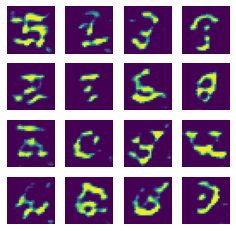

iteration:-  1000
iteration:-  1001
iteration:-  1002
iteration:-  1003
iteration:-  1004
iteration:-  1005
iteration:-  1006
iteration:-  1007
iteration:-  1008
iteration:-  1009
iteration:-  1010
iteration:-  1011
iteration:-  1012
iteration:-  1013
iteration:-  1014
iteration:-  1015
iteration:-  1016
iteration:-  1017
iteration:-  1018
iteration:-  1019
iteration:-  1020
iteration:-  1021
iteration:-  1022
iteration:-  1023
iteration:-  1024
iteration:-  1025
iteration:-  1026
iteration:-  1027
iteration:-  1028
iteration:-  1029
iteration:-  1030
iteration:-  1031
iteration:-  1032
iteration:-  1033
iteration:-  1034
iteration:-  1035
iteration:-  1036
iteration:-  1037
iteration:-  1038
iteration:-  1039
iteration:-  1040
iteration:-  1041
iteration:-  1042
iteration:-  1043
iteration:-  1044
iteration:-  1045
iteration:-  1046
iteration:-  1047
iteration:-  1048
iteration:-  1049
iteration:-  1050
iteration:-  1051
iteration:-  1052
iteration:-  1053
iteration:-  1054
iteration:

In [0]:
iterations = 20000
batch_size = 128
# sample_interval = 1000
sample_interval = 1000
obj=DCGAN()
discriminator=obj.build_discriminator(obj.img_shape)
discriminator.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
generator=obj.build_generator(obj.z_dim)
discriminator.trainable=False
gan=obj.build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer='Adam')

obj.train(iterations, batch_size, sample_interval)
print("Done")

